In [1]:
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

import pandas as pd  # Manipulasi data dalam bentuk tabel (DataFrame)
import datetime  # Modul untuk bekerja dengan tanggal dan waktu
import numpy as np  # Operasi numerik dan manipulasi array
import instaloader  # Mengunduh data dari Instagram

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
 
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
 
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import os

# Tentukan nama file data yang akan dibaca
csv_file = 'ulasan_aplikasiMaxime.csv'

# Cek apakah file data ada sebelum membacanya
if not os.path.exists(csv_file):
    print(f"Error: File data '{csv_file}' tidak ditemukan.")
    print("Silakan jalankan skrip 'scrape_data.ipynb' terlebih dahulu untuk mengunduh data.")
else:
    # Muat data dari file CSV ke dalam DataFrame
    print(f"Memuat data dari '{csv_file}'...")
    app_reviews_df = pd.read_csv(csv_file)
    
    # Tampilkan informasi untuk memastikan data berhasil dimuat
    print("\nData berhasil dimuat. Informasi DataFrame:")
    app_reviews_df.info()
    
    print("\n5 baris pertama data:")
    print(app_reviews_df.head())

Memuat data dari 'ulasan_aplikasiMaxime.csv'...

Data berhasil dimuat. Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121500 entries, 0 to 121499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              121500 non-null  object
 1   userName              121500 non-null  object
 2   userImage             121500 non-null  object
 3   content               121500 non-null  object
 4   score                 121500 non-null  int64 
 5   thumbsUpCount         121500 non-null  int64 
 6   reviewCreatedVersion  104417 non-null  object
 7   at                    121500 non-null  object
 8   replyContent          58283 non-null   object
 9   repliedAt             58283 non-null   object
 10  appVersion            104417 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.2+ MB

5 baris pertama data:
                               reviewId         userName  \


In [3]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121500 entries, 0 to 121499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              121500 non-null  object
 1   userName              121500 non-null  object
 2   userImage             121500 non-null  object
 3   content               121500 non-null  object
 4   score                 121500 non-null  int64 
 5   thumbsUpCount         121500 non-null  int64 
 6   reviewCreatedVersion  104417 non-null  object
 7   at                    121500 non-null  object
 8   replyContent          58283 non-null   object
 9   repliedAt             58283 non-null   object
 10  appVersion            104417 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.2+ MB


In [5]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1b1414ff-308e-44f8-9d2d-4e8738cb8f5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bisa ga maxim tu titik map nya yg bener dikit,...",2,12,3.16.9,2025-09-21 08:14:21,None,NaT,3.16.9
1,44b7ba28-013a-4eaa-9126-23830bb94210,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Barusan kecewa berat sama aplikasi ini. pesan ...,1,20,3.16.9,2025-09-18 20:31:02,None,NaT,3.16.9
2,850985ac-ef14-4941-98dc-5a7dfa1ab838,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk layanan aplikasi bagus sekali si cuman k...,2,60,3.16.9,2025-09-07 20:22:43,None,NaT,3.16.9
3,b51513d5-3f46-4f0a-8b38-687bc399e12a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi y bagus saya sudah lama menggunakanny...,5,9,3.16.10,2025-09-25 05:42:48,None,NaT,3.16.10
4,8b65d505-b931-4d01-9bbf-a2979dfcadb9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pake aplikasi Maxim ini lumayan sih aku suka t...,5,57,3.16.10,2025-09-19 19:37:07,None,NaT,3.16.10


In [6]:
# Menampilkan jumlah nilai kosong di setiap kolom sebelum diisi
print("Nilai kosong sebelum diisi:")
print(app_reviews_df.isnull().sum())

Nilai kosong sebelum diisi:
reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    17083
at                          0
replyContent            63217
repliedAt               63217
appVersion              17083
dtype: int64


In [7]:
#karena kolo yang dengan nilai kosong tidak berpengaruh pada analisis, maka kolom tersebut dihapus
clean2_df = app_reviews_df.drop(columns=['reviewCreatedVersion', 'replyContent', 'repliedAt', 'appVersion']) 


In [9]:
clean2_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121500 entries, 0 to 121499
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   reviewId       121500 non-null  object        
 1   userName       121500 non-null  object        
 2   userImage      121500 non-null  object        
 3   content        121500 non-null  object        
 4   score          121500 non-null  int64         
 5   thumbsUpCount  121500 non-null  int64         
 6   at             121500 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 6.5+ MB


In [10]:
clean2_df.duplicated().sum()

0

## **Preprocessing Text**

In [11]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [12]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [13]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean2_df['text_clean'] = clean2_df['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean2_df['text_casefoldingText'] = clean2_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean2_df['text_slangwords'] = clean2_df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean2_df['text_tokenizingText'] = clean2_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean2_df['text_stopword'] = clean2_df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean2_df['text_akhir'] = clean2_df['text_stopword'].apply(toSentence)

In [14]:
clean2_df

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,1b1414ff-308e-44f8-9d2d-4e8738cb8f5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bisa ga maxim tu titik map nya yg bener dikit,...",2,12,2025-09-21 08:14:21,bisa ga maxim tu titik map nya yg bener dikit ...,bisa ga maxim tu titik map nya yg bener dikit ...,bisa ga maxim tu titik map nya yg bener dikit ...,"[bisa, ga, maxim, tu, titik, map, nya, yg, ben...","[maxim, tu, titik, map, yg, bener, dikit, pas,...",maxim tu titik map yg bener dikit pas dicek ti...
1,44b7ba28-013a-4eaa-9126-23830bb94210,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Barusan kecewa berat sama aplikasi ini. pesan ...,1,20,2025-09-18 20:31:02,Barusan kecewa berat sama aplikasi ini pesan m...,barusan kecewa berat sama aplikasi ini pesan m...,barusan kecewa berat sama aplikasi ini pesan m...,"[barusan, kecewa, berat, sama, aplikasi, ini, ...","[barusan, kecewa, berat, aplikasi, pesan, maka...",barusan kecewa berat aplikasi pesan makanan wa...
2,850985ac-ef14-4941-98dc-5a7dfa1ab838,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk layanan aplikasi bagus sekali si cuman k...,2,60,2025-09-07 20:22:43,untuk layanan aplikasi bagus sekali si cuman k...,untuk layanan aplikasi bagus sekali si cuman k...,untuk layanan aplikasi bagus sekali si cuman k...,"[untuk, layanan, aplikasi, bagus, sekali, si, ...","[layanan, aplikasi, bagus, si, cuman, aplikasi...",layanan aplikasi bagus si cuman aplikasi layan...
3,b51513d5-3f46-4f0a-8b38-687bc399e12a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi y bagus saya sudah lama menggunakanny...,5,9,2025-09-25 05:42:48,aplikasi y bagus saya sudah lama menggunakanny...,aplikasi y bagus saya sudah lama menggunakanny...,aplikasi y bagus saya sudah lama menggunakanny...,"[aplikasi, y, bagus, saya, sudah, lama, menggu...","[aplikasi, bagus, menggunakannya, alhamdulilla...",aplikasi bagus menggunakannya alhamdulillah me...
4,8b65d505-b931-4d01-9bbf-a2979dfcadb9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pake aplikasi Maxim ini lumayan sih aku suka t...,5,57,2025-09-19 19:37:07,pake aplikasi Maxim ini lumayan sih aku suka t...,pake aplikasi maxim ini lumayan sih aku suka t...,pake aplikasi maxim ini lumayan sih aku suka t...,"[pake, aplikasi, maxim, ini, lumayan, sih, aku...","[pake, aplikasi, maxim, lumayan, suka, ongkirn...",pake aplikasi maxim lumayan suka ongkirnya mur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121495,9fd87bbb-fb72-48e3-bed6-29e17f7699ee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,driver ramah baik gesit.Good Job.Tuhan Berkati...,5,0,2022-04-01 20:22:38,driver ramah baik gesitGood JobTuhan Berkati p...,driver ramah baik gesitgood jobtuhan berkati p...,driver ramah baik gesitgood jobtuhan berkati p...,"[driver, ramah, baik, gesitgood, jobtuhan, ber...","[driver, ramah, gesitgood, jobtuhan, berkati, ...",driver ramah gesitgood jobtuhan berkati driver...
121496,7df7e0fd-53d1-4ee2-9409-8c88cba4e55d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pengemudi: Ajat Sudrajat dengan Motorcycle, wa...",5,0,2023-02-07 18:25:08,Pengemudi Ajat Sudrajat dengan Motorcycle warn...,pengemudi ajat sudrajat dengan motorcycle warn...,pengemudi ajat sudrajat dengan motorcycle warn...,"[pengemudi, ajat, sudrajat, dengan, motorcycle...","[pengemudi, ajat, sudrajat, motorcycle, warna,...",pengemudi ajat sudrajat motorcycle warna putih...
121497,275cc1c7-76f8-4a26-8ab1-6ae7f04d39f7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"take care mas, semoga ada yang muntah ye biar ...",5,0,2020-12-15 00:49:56,take care mas semoga ada yang muntah ye biar c...,take care mas semoga ada yang muntah ye biar c...,take care mas semoga ada yang muntah ye biar c...,"[take, care, mas, semoga, ada, yang, muntah, y...","[ta

## **Pelabelan**

In [15]:
import numpy as np
import csv
import requests
from io import StringIO

# --- 1. FUNGSI DAN DATA LEKSIKON ---

def sentiment_analysis_lexicon_indonesia(text, positive_lexicon, negative_lexicon):
    score = 0
    for word in text:
        if word in positive_lexicon:
            score += positive_lexicon[word]
        if word in negative_lexicon:
            score -= negative_lexicon[word]
    return score # Kita hanya butuh skor numeriknya

# Memuat leksikon positif dan negatif 
lexicon_positive = dict()
lexicon_negative = dict()
try:
    response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
    response.raise_for_status() 
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        if len(row) >= 2: lexicon_positive[row[0]] = int(row[1])
    print("Leksikon positif berhasil dimuat.")
except Exception as e:
    print(f"Gagal memuat leksikon positif: {e}")

try:
    response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
    response.raise_for_status()
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        if len(row) >= 2: lexicon_negative[row[0]] = int(row[1])
    print("Leksikon negatif berhasil dimuat.")
except Exception as e:
    print(f"Gagal memuat leksikon negatif: {e}")


# --- 2. PELABELAN AWAL BERDASARKAN KOLOM 'score' ---

conditions = [
    (clean2_df['score'] <= 2),
    (clean2_df['score'] == 3),
    (clean2_df['score'] >= 4)
]
choices = ['negative', 'neutral', 'positive']
clean2_df['polarity'] = np.select(conditions, choices, default='neutral')
print("\nDistribusi Sentimen Awal (berdasarkan score):")
print(clean2_df['polarity'].value_counts())


# --- 3. HITUNG SKOR LEKSIKON & LAKUKAN PENYEMPURNAAN ---

# Hitung skor leksikon untuk semua ulasan
clean2_df['polarity_score'] = clean2_df['text_stopword'].apply(
    sentiment_analysis_lexicon_indonesia, 
    args=(lexicon_positive, lexicon_negative)
)

# Terapkan penyempurnaan: Ubah label 'neutral' berdasarkan skor leksikon
# Kondisi: Jika 'polarity' adalah 'neutral' DAN 'polarity_score' > 0, ubah menjadi 'positive'
clean2_df.loc[(clean2_df['polarity'] == 'neutral') & (clean2_df['polarity_score'] > 0), 'polarity'] = 'positive'

# Kondisi: Jika 'polarity' adalah 'neutral' DAN 'polarity_score' < 0, ubah menjadi 'negative'
clean2_df.loc[(clean2_df['polarity'] == 'neutral') & (clean2_df['polarity_score'] < 0), 'polarity'] = 'negative'


# --- 4. MENAMPILKAN HASIL AKHIR ---
print("\nDistribusi Sentimen Akhir (setelah penyempurnaan leksikon):")
print(clean2_df['polarity'].value_counts())

print("\nContoh Hasil Akhir:")
# Menampilkan kolom 'score' dan 'polarity_score' untuk verifikasi
print(clean2_df[['content', 'score', 'polarity_score', 'polarity']].head(10))

Leksikon positif berhasil dimuat.
Leksikon negatif berhasil dimuat.

Distribusi Sentimen Awal (berdasarkan score):
polarity
positive    86104
negative    28855
neutral      6541
Name: count, dtype: int64

Distribusi Sentimen Akhir (setelah penyempurnaan leksikon):
polarity
positive    92117
negative    28855
neutral       528
Name: count, dtype: int64

Contoh Hasil Akhir:
                                             content  score  polarity_score  \
0  bisa ga maxim tu titik map nya yg bener dikit,...      2              45   
1  Barusan kecewa berat sama aplikasi ini. pesan ...      1              56   
2  untuk layanan aplikasi bagus sekali si cuman k...      2              65   
3  aplikasi y bagus saya sudah lama menggunakanny...      5              61   
4  pake aplikasi Maxim ini lumayan sih aku suka t...      5              48   
5  harusnya sih solusinya dari aplikasih makxim C...      4              37   
6  maxim bali kurang promosi seluruh bali jadi bo...      5             

In [16]:
clean2_df

,reviewId,userName,userImage,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity,polarity_score
0,1b1414ff-308e-44f8-9d2d-4e8738cb8f5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bisa ga maxim tu titik map nya yg bener dikit,...",2,12,2025-09-21 08:14:21,bisa ga maxim tu titik map nya yg bener dikit ...,bisa ga maxim tu titik map nya yg bener dikit ...,bisa ga maxim tu titik map nya yg bener dikit ...,"[bisa, ga, maxim, tu, titik, map, nya, yg, ben...","[maxim, tu, titik, map, yg, bener, dikit, pas,...",maxim tu titik map yg bener dikit pas dicek ti...,negative,45
1,44b7ba28-013a-4eaa-9126-23830bb94210,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Barusan kecewa berat sama aplikasi ini. pesan ...,1,20,2025-09-18 20:31:02,Barusan kecewa berat sama aplikasi ini pesan m...,barusan kecewa berat sama aplikasi ini pesan m...,barusan kecewa berat sama aplikasi ini pesan m...,"[barusan, kecewa, berat, sama, aplikasi, ini, ...","[barusan, kecewa, berat, aplikasi, pesan, maka...",barusan kecewa berat aplikasi pesan makanan wa...,negative,56
2,850985ac-ef14-4941-98dc-5a7dfa1ab838,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk layanan aplikasi bagus sekali si cuman k...,2,60,2025-09-07 20:22:43,untuk layanan aplikasi bagus sekali si cuman k...,untuk layanan aplikasi bagus sekali si cuman k...,untuk layanan aplikasi bagus sekali si cuman k...,"[untuk, layanan, aplikasi, bagus, sekali, si, ...","[layanan, aplikasi, bagus, si, cuman, aplikasi...",layanan aplikasi bagus si cuman aplikasi layan...,negative,65
3,b51513d5-3f46-4f0a-8b38-687bc399e12a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi y bagus saya sudah lama menggunakanny...,5,9,2025-09-25 05:42:48,aplikasi y bagus saya sudah lama menggunakanny...,aplikasi y bagus saya sudah lama menggunakanny...,aplikasi y bagus saya sudah lama menggunakanny...,"[aplikasi, y, bagus, saya, sudah, lama, menggu...","[aplikasi, bagus, menggunakannya, alhamdulilla...",aplikasi bagus menggunakannya alhamdulillah me...,positive,61
4,8b65d505-b931-4d01-9bbf-a2979dfcadb9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pake aplikasi Maxim ini lumayan sih aku suka t...,5,57,2025-09-19 19:37:07,pake aplikasi Maxim ini lumayan sih aku suka t...,pake aplikasi maxim ini lumayan sih aku suka t...,pake aplikasi maxim ini lumayan sih aku suka t...,"[pake, aplikasi, maxim, ini, lumayan, sih, aku...","[pake, aplikasi, maxim, lumayan, suka, ongkirn...",pake aplikasi maxim lumayan suka ongkirnya mur...,positive,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121495,9fd87bbb-fb72-48e3-bed6-29e17f7699ee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,driver ramah baik gesit.Good Job.Tuhan Berkati...,5,0,2022-04-01 20:22:38,driver ramah baik gesitGood JobTuhan Berkati p...,driver ramah baik gesitgood jobtuhan berkati p...,driver ramah baik gesitgood jobtuhan berkati p...,"[driver, ramah, baik, gesitgood, jobtuhan, ber...","[driver, ramah, gesitgood, jobtuhan, berkati, ...",driver ramah gesitgood jobtuhan berkati driver...,positive,8
121496,7df7e0fd-53d1-4ee2-9409-8c88cba4e55d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pengemudi: Ajat Sudrajat dengan Motorcycle, wa...",5,0,2023-02-07 18:25:08,Pengemudi Ajat Sudrajat dengan Motorcycle warn...,pengemudi ajat sudrajat dengan motorcycle warn...,pengemudi ajat sudrajat dengan motorcycle warn...,"[pengemudi, ajat, sudrajat, dengan, motorcycle...","[pengemudi, ajat, sudrajat, motorcycle, warna,...",pengemudi ajat sudrajat motorcycle warna putih...,positive,12
121497,275cc1c7-76f8-4a26-8ab1-6ae7f04d39f7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"take care mas, semoga ada yang muntah ye biar ...",5,0,2020-12-15 00:49:56,take care mas semoga ada yang muntah ye biar c...,take care mas semoga ada yang muntah ye b

## **Visualisasi**

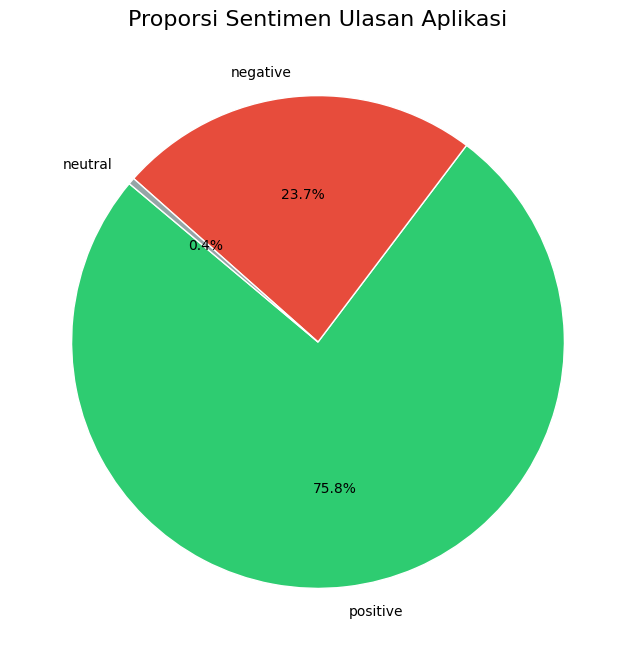

In [17]:
import matplotlib.pyplot as plt

# Menghitung jumlah setiap sentimen
sentiment_counts = clean2_df['polarity'].value_counts()

# Menentukan warna yang sesuai dengan sentimen
colors = ['#2ECC71', '#E74C3C', '#95A5A6'] # Sesuaikan urutan dengan output value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=140, 
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

# Menambahkan judul
plt.title('Proporsi Sentimen Ulasan Aplikasi', fontsize=16)
plt.ylabel('') # Menghilangkan label 'polarity' di samping

# Menampilkan plot
plt.show()

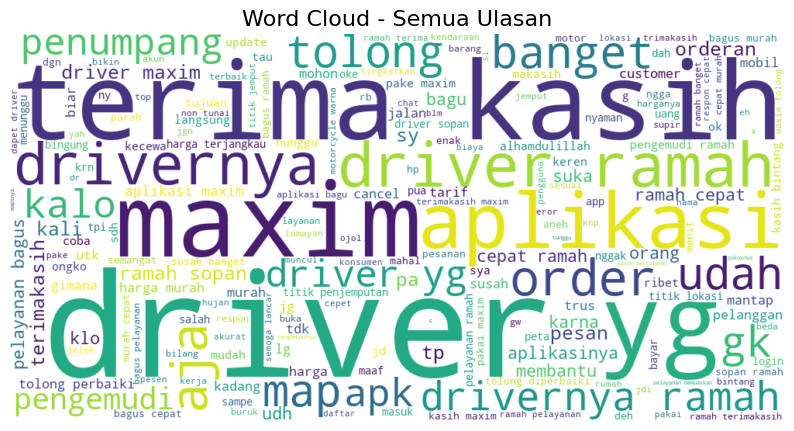

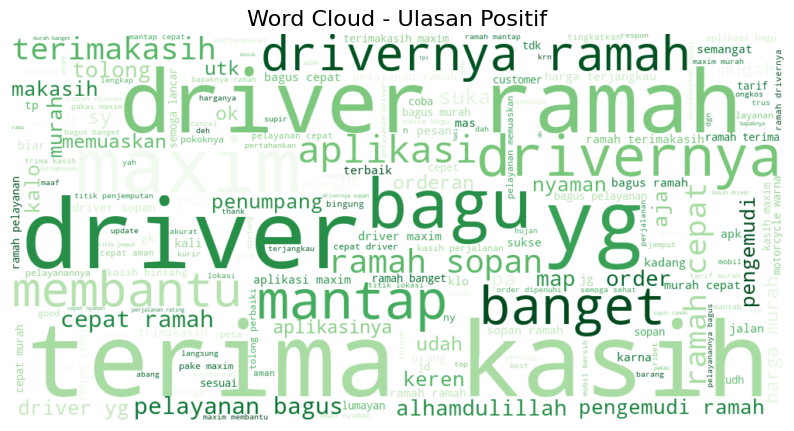

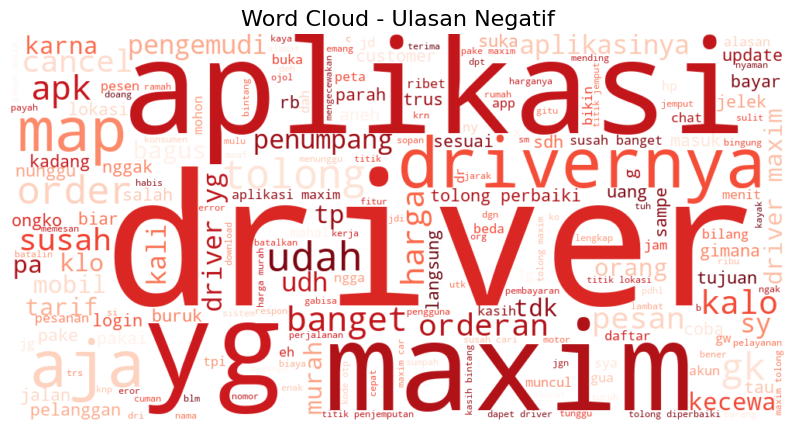

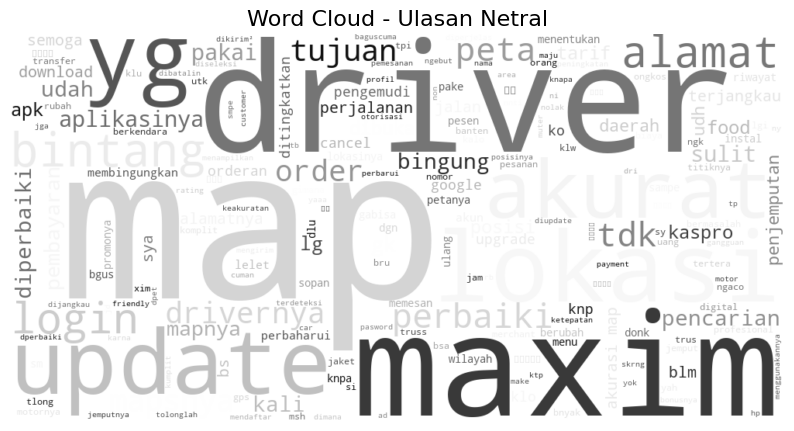

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- 1. Word Cloud General (Semua Ulasan) ---
all_text = ' '.join(clean2_df['text_akhir'])
wordcloud_all = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Semua Ulasan', fontsize=16)
plt.show()


# --- 2. Word Cloud untuk Ulasan Positif ---
positive_text = ' '.join(clean2_df[clean2_df['polarity'] == 'positive']['text_akhir'])
wordcloud_positive = WordCloud(width=1000, height=500, background_color='white', colormap='Greens').generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ulasan Positif', fontsize=16)
plt.show()


# --- 3. Word Cloud untuk Ulasan Negatif ---
negative_text = ' '.join(clean2_df[clean2_df['polarity'] == 'negative']['text_akhir'])
wordcloud_negative = WordCloud(width=1000, height=500, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Ulasan Negatif', fontsize=16)
plt.show()


# --- 4. Word Cloud untuk Ulasan Netral ---
neutral_text = ' '.join(clean2_df[clean2_df['polarity'] == 'neutral']['text_akhir'])

# Cek apakah ada teks untuk dibuat wordcloud, jika tidak, lewati
if neutral_text.strip():
    wordcloud_neutral = WordCloud(width=1000, height=500, background_color='white', colormap='Greys').generate(neutral_text)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud_neutral, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Ulasan Netral', fontsize=16)
    plt.show()
else:
    print("Tidak ada cukup kata pada ulasan netral untuk membuat Word Cloud.")

## **Data Splitting dan Ekstraksi Fitur dengan TF-IDF**

In [19]:
clean3_df = clean2_df 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import word2vec
import numpy as np

In [21]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean3_df['text_akhir']
y = clean3_df['polarity']
 
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)
 
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
 
# Menampilkan hasil ekstraksi fitur
features_df
 
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

### **Skema 1: SVM dengan TF-IDF (Pembagian 80/20)**

In [22]:
print("--- Menjalankan Skema 1: SVM | TF-IDF | Pembagian 80/20 ---")

# 1. Data sudah disiapkan dari sel sebelumnya (X_train, X_test, y_train, y_test)

# 2. Pelatihan Model (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 3. Evaluasi
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Akurasi: {accuracy_svm:.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_svm))

--- Menjalankan Skema 1: SVM | TF-IDF | Pembagian 80/20 ---
Akurasi: 0.8601
Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.73      0.68      0.70      5821
     neutral       0.00      0.00      0.00        98
    positive       0.90      0.92      0.91     18381

    accuracy                           0.86     24300
   macro avg       0.54      0.53      0.54     24300
weighted avg       0.85      0.86      0.86     24300



c:\Users\HP\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

### **Skema 2: Random Forest dengan Word2Vec (Pembagian 80/20)**

In [23]:
from gensim.models import Word2Vec

In [25]:
print("--- Menjalankan Skema 2: Random Forest | Word2Vec | Pembagian 80/20 ---")

# 1. Ekstraksi Fitur (Word2Vec menggunakan Gensim)
# Input untuk Word2Vec adalah kalimat yang sudah di-tokenisasi (dari kolom 'text_stopword')
tokenized_reviews = clean3_df['text_stopword'].tolist()

# Melatih model Word2Vec dengan Gensim
# PERHATIKAN: Gunakan 'Word2Vec' (huruf besar W dan V) dari gensim
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Fungsi untuk mengubah ulasan menjadi vektor dengan merata-ratakan vektor kata
def review_to_vector(review_tokens, model):
    # model.wv berisi semua vektor kata di gensim
    vectors = [model.wv[word] for word in review_tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Membuat matriks fitur dari Word2Vec
X_w2v = np.array([review_to_vector(review, w2v_model) for review in tokenized_reviews])

# 2. Pembagian Data (80/20)
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    X_w2v, y, test_size=0.2, random_state=42
)

# 3. Pelatihan Model (Random Forest)
rf_model_w2v = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_w2v.fit(X_train_w2v, y_train_w2v)

# 4. Evaluasi
y_pred_rf_w2v = rf_model_w2v.predict(X_test_w2v)
accuracy_rf_w2v = accuracy_score(y_test_w2v, y_pred_rf_w2v)

print(f"Akurasi: {accuracy_rf_w2v:.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test_w2v, y_pred_rf_w2v))

--- Menjalankan Skema 2: Random Forest | Word2Vec | Pembagian 80/20 ---
Akurasi: 0.8734
Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.74      0.75      0.74      5821
     neutral       0.38      0.03      0.06        98
    positive       0.92      0.92      0.92     18381

    accuracy                           0.87     24300
   macro avg       0.68      0.57      0.57     24300
weighted avg       0.87      0.87      0.87     24300



### **Skema 3: Random Forest dengan TF-IDF (Pembagian 70/30)**

In [26]:
print("--- Menjalankan Skema 3: Random Forest | TF-IDF | Pembagian 70/30 ---")

# 1. Fitur TF-IDF sudah dibuat di sel sebelumnya (X_tfidf)

# 2. Pembagian Data (70/30)
X_train_7030, X_test_7030, y_train_7030, y_test_7030 = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42
)

# 3. Pelatihan Model (Random Forest)
rf_model_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_tfidf.fit(X_train_7030, y_train_7030)

# 4. Evaluasi
y_pred_rf_tfidf = rf_model_tfidf.predict(X_test_7030)
accuracy_rf_tfidf = accuracy_score(y_test_7030, y_pred_rf_tfidf)

print(f"Akurasi: {accuracy_rf_tfidf:.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test_7030, y_pred_rf_tfidf))

--- Menjalankan Skema 3: Random Forest | TF-IDF | Pembagian 70/30 ---
Akurasi: 0.8575
Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.71      0.70      0.71      8710
     neutral       0.08      0.01      0.01       156
    positive       0.90      0.91      0.91     27584

    accuracy                           0.86     36450
   macro avg       0.57      0.54      0.54     36450
weighted avg       0.85      0.86      0.86     36450



## **Menympan Model**

In [27]:
import joblib
import os

# Buat direktori untuk menyimpan model jika belum ada
os.makedirs('models', exist_ok=True)

# --- Simpan Objek Skema 1 (SVM + TF-IDF) ---
# Catatan: 'tfidf' adalah TfidfVectorizer dari pembagian data 80/20
joblib.dump(svm_model, 'models/svm_model_tfidf_8020.pkl')
joblib.dump(tfidf, 'models/tfidf_vectorizer_8020.pkl')
print("Skema 1 (SVM+TF-IDF): Model dan vectorizer berhasil disimpan.")

# --- Simpan Objek Skema 2 (Random Forest + Word2Vec) ---
joblib.dump(rf_model_w2v, 'models/rf_model_w2v_8020.pkl')
w2v_model.save('models/w2v_model_8020.word2vec')
print("Skema 2 (RF+Word2Vec): Model dan vectorizer berhasil disimpan.")

# --- Simpan Objek Skema 3 (Random Forest + TF-IDF) ---
# Catatan: Kita perlu menyimpan vectorizer tfidf yang spesifik untuk pembagian 70/30.
# Untuk memastikan, kita akan fit ulang vectorizer pada seluruh data X dan menyimpannya.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_7030 = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf_7030 = tfidf_7030.fit(X) # fit pada seluruh data teks 'X'

joblib.dump(rf_model_tfidf, 'models/rf_model_tfidf_7030.pkl')
joblib.dump(tfidf_7030, 'models/tfidf_vectorizer_7030.pkl')
print("Skema 3 (RF+TF-IDF): Model dan vectorizer berhasil disimpan.")

Skema 1 (SVM+TF-IDF): Model dan vectorizer berhasil disimpan.
Skema 2 (RF+Word2Vec): Model dan vectorizer berhasil disimpan.
Skema 3 (RF+TF-IDF): Model dan vectorizer berhasil disimpan.
